# Sok-1006 Mikro
## Seminar 7
### Oppgave 1

Vi har med en Cobb-Douglas funskjon å gjøre, og da kan vi tolke a og b som elastisiteter som uttrykker hvor mye Stan liker hvert av godene. Dersom han får 1% ekstra av gode 1 (2) økes nytten med a% (b%).    
Vi skal gjenbruke mye av koden fra Seminar 4 oppgave 2 her!

### deloppgave 1

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [2]:
# Sett opp Lagrange for nyttemaksimering
sp.symbols("\lambda", real=True, positive=True)
x_1, x_2, a, b,m, p_1, p_2, lmda =sp.symbols("x_1 x_2 a b m p_1 p_2 \lambda", real=True, positive=True)
U=x_1**a*x_2**b
L=U-lmda*(p_1*x_1+p_2*x_2-m)
L

-\lambda*(-m + p_1*x_1 + p_2*x_2) + x_1**a*x_2**b

In [3]:
# Førsteordensbetingelser
dL_x_1=sp.diff(L,x_1)
dL_x_2=sp.diff(L,x_2)
display(dL_x_1)
display(dL_x_2)

-\lambda*p_1 + a*x_1**a*x_2**b/x_1

-\lambda*p_2 + b*x_1**a*x_2**b/x_2

In [4]:
display(dL_x_1.args)
display(dL_x_2.args)

(-\lambda*p_1, a*x_1**a*x_2**b/x_1)

(-\lambda*p_2, b*x_1**a*x_2**b/x_2)

In [5]:
display(dL_x_1.args[0]/dL_x_2.args[0])
display(dL_x_1.args[1]/dL_x_2.args[1])

p_1/p_2

a*x_2/(b*x_1)

Da har vi $\frac{p_1}{p_2}=\frac{ax_2}{bx_1}$ som gir oss det relative forholdet mellom etterspurt mengde $x_1$ og $x_2$ som $x_2=\frac{bp_1x_1}{ap_2}$.     En annen måte å tenke på dette er $\frac{p_1x_1}{p_2x_2}=\frac{a}{b}$ som sier at den relative utgiften på godene er det samme som det relative forhold mellom elastisitetene (som uttrykker relativt hvor glad Stan er i godene).

For å fullføre løsningen bruker vi denne informasjonen i budsjettbetingelsen.

In [6]:
x_1_sol=sp.solve(sp.Eq((p_1*x_1+p_2*x_2).subs(x_2,b*p_1*x_1/(a*p_2)),m),x_1)[0]
x_2_sol=sp.solve(sp.Eq((p_1*x_1+p_2*x_2).subs(x_1,a*p_2*x_2/(b*p_1)),m),x_2)[0]
display(x_1_sol)
display(x_2_sol)

a*m/(p_1*(a + b))

b*m/(p_2*(a + b))

Dette er Stan sin etterspørsel etter gode 1 og gode 2. For å forklare kan vi skrive $p_1x_1=\frac{a}{a+b}m, p_2x_2=\frac{b}{a+b}m$. Utgiften på hvert gode er en fast andel av inntekten, hvor andelen er gitt ved den relative styrken på Stan sine preferanser for de to godene. Legg også merke til at etterspørsel etter gode 1 er uavhengig av prisen på gode 2 (og det samme for gode 2 som er uavhengig av $p_1$).      
Når et godes egen pris øker, så går etterspørsel etter det gode ned:

In [7]:
display(sp.diff(x_1_sol,p_1))
display(sp.diff(x_2_sol,p_2))

-a*m/(p_1**2*(a + b))

-b*m/(p_2**2*(a + b))

Begge goder er normal (en økning i inntekt gir en økning i etterspørsel):

In [8]:
display(sp.diff(x_1_sol,m))
display(sp.diff(x_2_sol,m))

a/(p_1*(a + b))

b/(p_2*(a + b))

In [9]:
# endring i a
display(sp.simplify(sp.diff(x_1_sol,a)))
display(sp.diff(x_2_sol,a))

b*m/(p_1*(a + b)**2)

-b*m/(p_2*(a + b)**2)

Når a øker betyr det at Stan får relativt mer nytte enn før fra gode 1, og dette øker etterspørselen etter gode 1 og reduserer etterspørsel etter gode 2. Det motsatte skjer dersom b øker:

In [10]:
# endring i b
display(sp.diff(x_1_sol,b))
display(sp.simplify(sp.diff(x_2_sol,b)))

-a*m/(p_1*(a + b)**2)

a*m/(p_2*(a + b)**2)

For å tegne indifferenskurver må vi løse $u_0=U$ for $x_2$, hvor $u_0$ er et vilkårlig valgt nyttenivå.

In [11]:
u_0=sp.symbols('u_0')
x_2_ind_sol=sp.solve(U-u_0,x_2)[0]
x_2_ind_sol

u_0**(1/b)/x_1**(a/b)

In [12]:
indiff_x_2=sp.lambdify( (u_0,a,b,x_1), x_2_ind_sol)
indiff_x_2(u_0,a,b,x_1)

u_0**(b**(-1.0))/x_1**(a/b)

In [13]:
nytte_nivå=sp.lambdify((a,b,p_1,p_2,m), x_1_sol**a*x_2_sol**b)
nytte_nivå(a,b,p_1,p_2,m)

(a*m/(p_1*(a + b)))**a*(b*m/(p_2*(a + b)))**b

In [14]:
# sett p1=0.25,p2=.5,a=.4,b=.5, m=.2
nytte_nivå(.4,.5,.25,.5,.2)

0.31171430324637

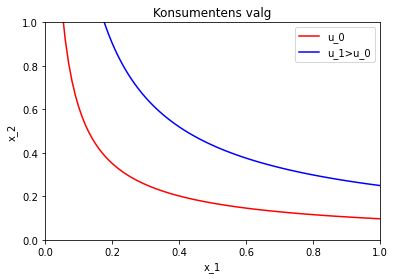

In [19]:
x_num=np.linspace(0.01,1,100)

# eksempel med p1=0.25,p2=.5,a=.4,b=.5, m=.2

fig,ax=plt.subplots()
 
ax.set_ylabel('x_2')
ax.set_xlabel('x_1')
ax.plot(x_num, indiff_x_2(nytte_nivå(.4,.5,.25,.5,.2), 0.4,0.5,x_num),label='u_0', color='red')
# tegn også en indifferenskurve med høyere nytte u_1=.5
ax.plot(x_num, indiff_x_2(.5, 0.4,0.5,x_num),label='u_1>u_0', color='blue')

             
    
ax.set_ylim([0, 1])
ax.set_xlim([0, 1])


ax.legend(loc='upper right')
ax.set_title('Konsumentens valg')


plt.show()

Vi tegner inn Stans budsjett.

In [16]:
# budsjett
def x_2_bud(m, p_1,p_2,x_1):
    return (m-p_1*x_1)/p_2
x_2_bud(m, p_1,p_2,x_1)

(m - p_1*x_1)/p_2

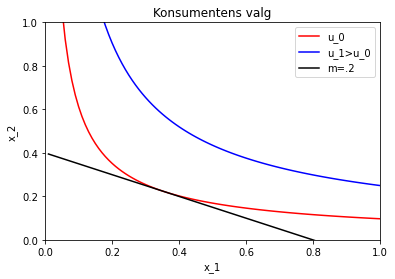

In [20]:
# sett p1=0.25,p2=.5,a=.4,b=.5, m=.2
ax.plot(x_num, x_2_bud(.2, .25,.5,x_num), label='m=.2', color='black')
ax.legend(loc='upper right')
fig

Optimal tilpasning i tangeringspunktet mellom indifferenskurve u_0 og budsjettlinjen. Forklar dette for å svare på deloppgave b).     
Du kan også basere forklaringen på det som vi kome frem til ovenfor: $\frac{p_1}{p_2}=\frac{ax_2}{bx_1}$. Venstre side er den relative prisen på gode 1 og forteller hvor mange enheter av gode 2 vi må gi opp for å kjøpe en ekstra enhet av gode 1. Dette er den absolutte størrelsen på helningen til budsjettlikningen (helningen er negativ ettersom budsjettlinjen peker nedover). Høyre side er marginal substitusjonsbrøk (MSB), og forteller hvor mange enheter av gode 2 Stan er villig til å gi opp for å få en ekstra enhet av gode 1. Dette er den absolutte verdien til helningen til indifferenskurven. Når tilpasningen er slik at mengden av gode 2 som Stan er villig til å gi opp for en ekstra enhet av 1 er nøyaktig det samme som det han faktisk må gi opp kan han ikke forbedre sin situasjon. Gjennomfør et tankeeksperiment for å overbevise deg selv at dette stemmer: "Om Stan er villig til å gi opp flere (færre) enheter av gode 2 enn han faktisk må, så kan han.........., og øke sin nytte".

### deloppgave c)     
En bedrift med en C-D produktfunksjon med stigende skalautbytte vil alltid øke produksjonsnivået for å øke fortjeneste. Her vil det ikke være et problem ettersom valgene til konsumenten er begrgrenset av budsjettbetingelsen. (Likner på kostnadsminimering til en bedrift).

### deloppgave d)     
I motsetning til produktfunksjon som uttrykker antall enheter produsert, betyr ikke måleenhetene noe i en nyttefunksjon. Stan foretrekker godekombinasjon $(x_1,x_2)$ over $(x'_1,x'_2)$ dersom $U(x_1,x_2)>U(x'_1,x'_2)$. Tenk deg at nyttefunksjonen til Stan endres til 5U. Han foretrekker fortsatt $(x_1,x_2)$ over $(x'_1,x'_2)$ ettersom $5U(x_1,x_2)>5U(x'_1,x'_2)$. Det at vi har ganget antall nytteenheter med 5 har ingenting å si på valget mellom de to godekombinasjoner. Det er det samme om vi tar en logaritmisk transformasjon av nyttefunksjonen i (1) i oppgavesettet. Denne transformasjonen er også slik at dersom a>b>0, så er ln(a)>ln(b). Dersom Stan foretrekker $(x_1,x_2)$ over $(x'_1,x'_2)$ så vil Sylvester også gjøre det!     
Du kan sjekke at nyttemaksimering med (2) gir nøyaktig samme etterspørsel som med (1). Brødrene etterspør samme mengden (men måler nytte på forskjellige vis).